# Logistic Regression Example: Bank Credit Score Prediction

Bu notebook, banka kredi skoru tahmini için lojistik regresyon modelini kullanarak bir örnek uygulamayı adım adım açıklamaktadır.

## Veri Seti

Bu örnek için, üç özelliğe sahip (özellik 1, özellik 2 ve özellik 3) ve ikili bir hedef değişken (kredi skoru: 1 iyi, 0 kötü) içeren sentetik bir veri seti oluşturulmuştur.

In [1]:
# Gerekli kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Sentetik veri seti oluşturulması
np.random.seed(0)
n_samples = 1000
X = np.random.randn(n_samples, 3)
# İkili hedef değişken oluşturulması: 1 iyi kredi skoru, 0 kötü kredi skoru
y = (X[:, 0] + 2*X[:, 1] - X[:, 2] > 1).astype(int)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modelin Eğitilmesi

Logistic Regression modelimizi oluşturup eğitelim.

In [2]:
# Modeli oluşturma ve eğitme
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Tahminler ve Model Değerlendirmesi

Test seti üzerinde tahminler yaparak modelimizin performansını değerlendirelim.

In [3]:
# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Model performansını değerlendirme
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Sınıflandırma Raporu:\n", classification_rep)
print("Karışıklık Matrisi:\n", conf_matrix)
print("Doğruluk Skoru: ", accuracy)

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       119
           1       1.00      0.96      0.98        81

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

Karışıklık Matrisi:
 [[119   0]
 [  3  78]]
Doğruluk Skoru:  0.985


## Verilerin ve Tahminlerin Görselleştirilmesi

Verilerimizi ve modelimizin tahminlerini görselleştirelim.

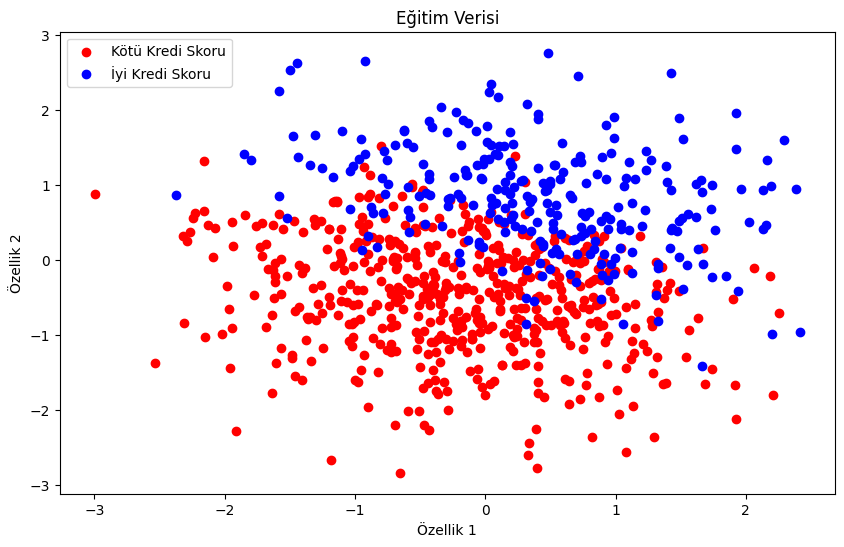

In [4]:
# Eğitim verisinin görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Kötü Kredi Skoru')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='İyi Kredi Skoru')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.title('Eğitim Verisi')
plt.legend()
plt.show()

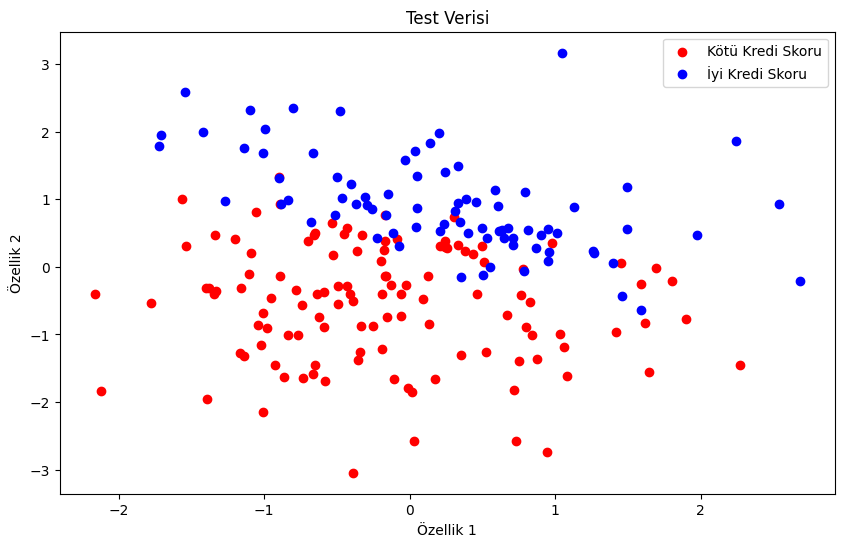

In [5]:
# Test verisinin görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Kötü Kredi Skoru')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='İyi Kredi Skoru')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.title('Test Verisi')
plt.legend()
plt.show()

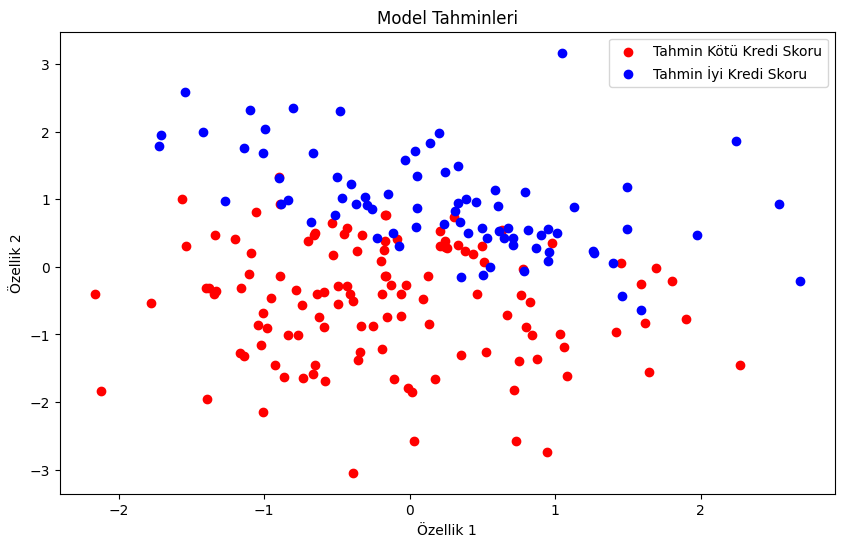

In [6]:
# Model tahminlerinin görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_pred == 0][:, 0], X_test[y_pred == 0][:, 1], color='red', label='Tahmin Kötü Kredi Skoru')
plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], color='blue', label='Tahmin İyi Kredi Skoru')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.title('Model Tahminleri')
plt.legend()
plt.show()